In [1]:
#컬러 스페이스 변환

import cv2
import numpy as np

img = cv2.imread('./img/girl.jpg')
img2 = img.astype(np.uint16)
b,g,r = cv2.split(img2) #채널별로 분리

#(b+g+r)/3으로 평균값 계산해서 그레이스케일로 만들 수도 있음
gray1 = ((b+g+r)/3).astype(np.uint8) 

#그레이 스케일로 변경
gray2=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#HSV, HSI, HSL

#H(색조) 픽셀이 어떤 색인지 표현
"""
빨강: 165-180, 0-15
초록: 45-75
파랑: 90-120
"""

#S(채도)
#0-255사이의 값을 가지며 255는 가장 순수한 색상 의미

#L(명도)
#0-255사이의 값을 가지며 255인 경우가 가장 밝은 값

import cv2
import numpy as np

red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8)
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8)

#bgr 컬러스페이스를 HSV 컬러 스페이스로 변환
red_HSV = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_HSV = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_HSV = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_HSV = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#hsv로 변환한 픽셀 출력
print('red', red_HSV)
print('green', green_HSV)
print('blue', blue_HSV)
print('yellow', yellow_HSV)


red [[[  0 255 255]]]
green [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


In [4]:
#yuv,ycbCr
#사람이 색상을 인식할 때 밝기에 더 민감하고 
#색상은 상대적으로 둔 감한 점을 고려해서 만든 컬러 스페이스

"""
Y - 밝기
U - 밝기와 파랑색과의 색상 차
V - 밝기와 빨간색과의 색상 차를 표현

픽셀의 밝기를 제어해야 할 때 BGR 포맷은 3채널을 모두 연산해야 하지만
YUV 포맷은 Y채널 하나만 작업하면 되므로 효과적
"""

import cv2
import numpy as np

dark = np.array([[[0,0,0]]], dtype=np.uint8)
middle = np.array([[[127,127,127]]], dtype=np.uint8)
bright = np.array([[[255,255,255]]], dtype=np.uint8)

#bgr 컬러스페이스를 YUV 컬러 스페이스로 변환
dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV);
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV);
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV);

#yuv로 변환한 픽셀 출력
print('dark', dark_yuv)
print('middle', middle_yuv)
print('bright', bright_yuv)

dark [[[  0 128 128]]]
middle [[[127 128 128]]]
bright [[[255 128 128]]]


In [5]:
#스페시홀딩(임계값)
"""
여러 점수를 커트라인을 기준으로 합격과 불합격으로 나누는 것처럼 여러 값을 경계점을 기준으로 두가지 부류로 나누는 것으로
바이너리 이미지를 만드는 가장 대표적인 방법

바이너리 이미지를 만들기 위해서는 컬러 이미지를 그레이 스케일로 바꾸고, 각 픽셀의 값이 경계값을 넘으면 255, 넘지 못하면 0을 지정

ret, out = cv2.threshould(img, threshold, value, type_flag)
  -img:Numpy배열, 변환할 이미지
  -threshold:경계값
  -value:경계값 기준에 만족하는 픽셀에 적용할 값
  -type_flag:스레시홀드 적용 방법 지정
    -cv2.THRESH_BINARY:px > threshold ? value : 0, 픽셀 값이 경계값을 넘으면 value를 지정하고, 넘지못하면 0을 지정
    -cv2.TRHESH_BINARY_INV:px > threshold ? 0 : value, THRESH_BINARY의 반대
    -cv2.THRESH_TRUNC:px > threshold ? value : px, 픽셀 값이 경계값을 넘으면 value를 지정하고, 넘지못하면 원래값 유지
    -cv2.THRESH_TOZERO:px > threshold ? px : 0, 픽셀값이 경계값을 넘으면 원래 값을 유지, 넘지 못하면 0을 지정
    -cv2.THRESH_TOZERO_INV:px > threshold ? 0 : px, cv2.THRESH_TOZERO의 반대
  -ret"스레시홀딩에 사용한 경계값
  -out:결과 바이너리 이미지
    
#범위가 0-255일때 0이면 검은색 255라면 흰색 숫자가 높을 수록 밝음
"""
#ex)종이에서 글씨만을 분리하거나 배경에서 전경을 분리하는 것과 같은 작업

127.0


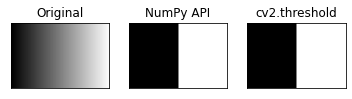

In [9]:
#전역 스레시홀딩

import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지를 그레이 스케일로 읽기
img = cv2.imread('./img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

#numpy 연산으로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)
thresh_np[img>127]=255

#opencv함수로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret) #바이너리 이미지에 사용된 경계값 반환

#원본과 결과물 출력

imgs = {'Original': img, 'NumPy API' :thresh_np, 'cv2.threshold':thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

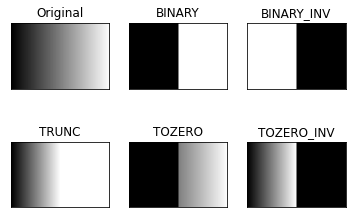

In [10]:
#스래시 홀딩 플래스 실습

import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지를 그레이 스케일로 읽기
img = cv2.imread('./img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'Original': img, 'BINARY' :t_bin, 'BINARY_INV':t_bininv, 'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

otsu threshold: 131.0


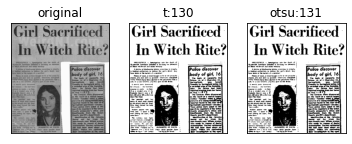

In [3]:
#오츠의 알고리즘
#모든 경우의 수에 대해 경계값을 조사해야 하므로 속도가 빠르지 못함.
#또한 노이즈가 많은 영상에는 오츠의 알고리즘을 적용해도 좋은 결과를 얻기 힘들다.
#|는 왼쪽|오른쪽 왼쪽에서 나온 결과물을 오른쪽에 전달 (파이프)

import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지를 그레이 스케일로 읽기
img = cv2.imread('./img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)

#경계값을 130으로 지정
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
#경계값을 지정하지 않고 오츠의 알고리즘 선택
#-1자리는 아무 숫자나 와도 됨 왜냐면 cv2.thresh_otsu 값이 넘어올 것이기 때문 
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#오츠의 알고리즘으로 선택된 경계값 출력
print('otsu threshold:', t)

imgs = {'original':img, 't:130':t_130, 'otsu:%d'%t: t_otsu }

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    
    plt.xticks([]); plt.yticks([])
    
plt.show()

In [ ]:
"""
원본 영상에 조명이 일정하지 않거나 배경색이 여러가지인 경우에는 아무리 여러번 경계값을 바꿔가며 시도해도
하나의 경계값을 이미지 전체에 적용해서는 좋은 결과를 얻지 못함. 이때는 이미지를 여러 영역으로 나눈 다음 그 주변 픽셀 값만
가지고 계산을 해서 경계값을 구해야하는데 이것을 적응형 스레시홀드라고 함


cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)
  -img:입력 영상
  -value:경계값을 만족하는 픽셀에 적용할 값
  -method:경계값 결정
    -cv2.ADAPTIVE_THRESH_MEAN_C:이웃 픽셀의 평균으로 결정
    -cv2.ADAPTIVE_THRESH_GAUSSIAN_C:가우시안 분포에 따른 가중치의 합으로 결정
  -type_flag:스레시홀드 적용 방법 지정(cv2.threshold() 함수와 동일)
  -block_size:영역으로 나눌 이웃의 크기(nxn), 홀수(3,5,7...)
  -C:계산된 경계 값 결과에서 가감할 상수(음수 가능)
"""

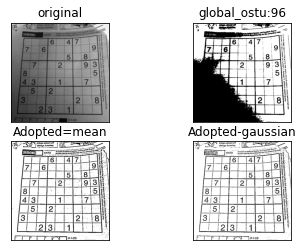

In [4]:
#적응형 스레시홀드
#이미지를 여러 영역으로 나눈 다음 그 주변 픽셀 값만 가지고 계산을 해서 경계값으 구함

import cv2
import numpy as np
import matplotlib.pyplot as plt

blk_size=9 #블록 사이즈
C=5 #차감상수
img = cv2.imread('./img/sudoku.png', cv2.IMREAD_GRAYSCALE)

#오츠의 알고리즘
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#적응형 스레시홀드를 평균과 가우시간 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                           cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                           cv2.THRESH_BINARY, blk_size, C)


imgs = {'original':img, 'global_ostu:%d'%ret:th1, \
        'Adopted=mean':th2, 'Adopted-gaussian':th3}


for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

#보기엔 평균이 더 좋아보인다 하지만 가우시안에서도 잘 나온 축이며 잡티를 잘 잡아준걸 볼수 있다.

In [21]:
#이미지 연산

In [24]:
#영상과 영상의 연산
#굳이 opencv로 연산하는 이유는 더하기나 빼기연산을 했을 때 
#0-255보다 작을 수도 클 수도 있어서 결과값을 0과 255로 제한할 안전장치가 필요하기 때문

#사칙연산
import cv2
import numpy as np

#사칙연산에 사용할 배열 생성
a=np.uint8([[200,50]])
b=np.uint8([[100,100]])

#numpy 배열 직접연산
add1 = a+b
sub1 = a-b
mult1=a*2
div1=a/3

#opencv API를 이용한 연산
add2=cv2.add(a,b)

sub2= cv2.subtract(a,b)

mult2= cv2.multiply(a,2)
div2 = cv2.divide(a,3)

#출력
print(add2)
print(sub2)
print(mult2)
print(div2)


[[255 150]]
[[100   0]]
[[255 100]]
[[67 17]]


In [26]:
"""
#call by 레퍼런스

b+=a

cv2.add(a,b,b) or b=cv2.add(a,b)
a+b를 b로 
"""

import cv2
import numpy as np

a=np.array([[1,2]], dtype=np.uint8)
b=np.array([[10,20]], dtype=np.uint8)
mask=np.array([[1,0]], dtype=np.uint8)

#누적할당과의 비교연산
c1=cv2.add(a,b, None, mask)
print(c1)
#0인 수는 b로 출력
c2=cv2.add(a,b, b, mask)
print(c2)




[[11  0]]
[[11 20]]


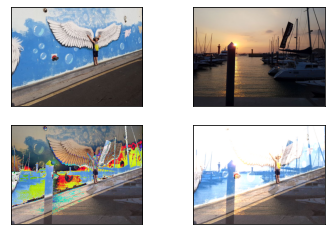

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./img/wing_wall.jpg')
img2 = cv2.imread('./img/yate.jpg')

img3 = img1+img2
img4 = cv2.add(img1, img2)

imgs={'img1':img1, 'img2':img2,
     'img1+img2': img3, 'cv2.add(img1,img2)':img4}

#이미지 출력

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
    
plt.show()


In [8]:
#알파블랜딩
"""
두영상을 합성하는데 각 픽셀의 합이 255가 되지 않게 각각의 영상에 가중치를 줘서 계산

cv2.addWeighted(img1, alpha, img2, beta, gamma)
  -img1, img2:합성할 두 영상
  -alpha:img1에 지정할 가중치(알파값)
  -beta:img2에 지정할 가중치, 흔히 (1-알파값) 적용
  -gamma:연산 결과에 가감할 상수, 흔히 0(zero)적용
"""

#각 영상에 대해  50%의 가중치로 앞서 실습한 영상을 다시 합성

import cv2
import numpy as np

alpha = 0.5

img1 = cv2.imread('./img/wing_wall.jpg')
img2 = cv2.imread('./img/yate.jpg')

#수식직접 연산 알파블랜딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) #소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

#addweighted()함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
#트랙바로 알파 블랜딩

import cv2
import numpy as np

#창이름
win_name = 'alpha blending'
#트랙바 이름
trackbar_name = 'fade'

#트랙바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)
    
#합성영상 읽기

img1 = cv2.imread('./img/man_face.jpg')
img2 = cv2.imread('./img/lion_face.jpg')

cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

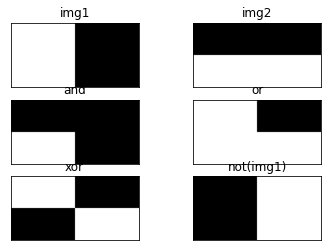

In [4]:
#비트와이즈 연산
import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8)
img1[:, :200] =255 #왼쪽은 검정(0) 오른쪽은 흰색(255)
img2[100:200, :]= 255 #위쪽은 검정(0) , 아래쪽은 흰색(255)

bitAnd = cv2.bitwise_and(img1, img2)
bit0r = cv2.bitwise_or(img1,img2) #두 조건을 모두 충족할 떄
bitXor = cv2.bitwise_xor(img1, img2) #둘다 FALSE 혹은 둘다 TRUE일때만 검출
bitNot = cv2.bitwise_not(img1) #위와 반대

#plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 'or':bit0r, 'xor':bitXor, 'not(img1)':bitNot}

for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1) 
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([]) #x축과 y축 값을 안넣음
    
plt.show()

In [3]:
#bitwise and 연산으로 마스킹하기
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./img/girl.jpg')

#마스크 만들기
mask = np.zeros_like(img)    
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상 이미지, (원점x,원점y), 반지름, (색상), 채우기)

#마스킹
masked = cv2.bitwise_and(img, mask)

#결과출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
#and 연산일때 0(검정)이 아닌 값만 인식 즉 0이 아닌 값들에 대해서만 and연산이 이루어지는 듯함
cv2.imshow('masked', masked) 
cv2.waitKey()
cv2.destroyAllWindows()